In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
import os
import sys
sys.path.append('.')

from pathlib import Path


In [4]:
conform_path = 'MyDrive/conform/CONFORM' #modify this depending on your folders
env_path = Path('/content/drive') / conform_path

if str(env_path) not in sys.path:
    sys.path.append(str(env_path))

In [5]:
# getting some warnings and errors here but the model is working somehow
# (ERROR: pip's dependency resolver does not currently take into account all the packages that are installed)

# system packages
!apt-get update
!apt-get install -y libgmp-dev libgnutls30 libidn2-0 libjpeg-dev libtiff-dev libwebp-dev liblz4-dev libbz2-dev libarchive-dev libyaml-dev libzstd-dev

# python packages
!pip install torch torchvision torchaudio accelerate==0.28.0 anyio==4.3.0 argon2-cffi==23.1.0 argon2-cffi-bindings==21.2.0 \
            arrow==1.3.0 asttokens==2.4.1 async-lru==2.0.4 attrs==23.2.0 babel==2.14.0 beautifulsoup4==4.12.3 \
            bleach==6.1.0 cffi==1.16.0 comm==0.2.2 debugpy==1.8.1 decorator==5.1.1 defusedxml==0.7.1 diffusers==0.21.4 \
            executing==2.0.1 fastjsonschema==2.19.1 fqdn==1.5.1 fsspec==2024.3.1 h11==0.14.0 httpcore==1.0.5 httpx==0.27.0 \
            huggingface-hub==0.22.2 importlib-metadata==7.1.0 ipykernel==6.29.4 ipython==8.23.0 ipywidgets==8.1.2 \
            isoduration==20.11.0 jedi==0.19.1 joblib==1.3.2 json5==0.9.24 jsonpointer==2.4 jsonschema==4.21.1 \
            jsonschema-specifications==2023.12.1 jupyter==1.0.0 jupyter-client==8.6.1 jupyter-console==6.6.3 \
            jupyter-core==5.7.2 jupyter-events==0.10.0 jupyter-lsp==2.2.4 jupyter-server==2.13.0 jupyter-server-terminals==0.5.3 \
            jupyterlab==4.1.5 jupyterlab-pygments==0.3.0 jupyterlab-server==2.25.4 jupyterlab-widgets==3.0.10 \
            matplotlib-inline==0.1.6 mistune==3.0.2 nbclient==0.10.0 nbconvert==7.16.3 nbformat==5.10.4 nest-asyncio==1.6.0 \
            notebook==7.1.2 notebook-shim==0.2.4 overrides==7.7.0 packaging==24.0 pandocfilters==1.5.1 parso==0.8.3 \
            pexpect==4.9.0 platformdirs==4.2.0 prometheus-client==0.20.0 prompt-toolkit==3.0.43 psutil==5.9.8 ptyprocess==0.7.0 \
            pure-eval==0.2.2 pycparser==2.22 pygments==2.17.2 python-dateutil==2.9.0.post0 python-json-logger==2.0.7 \
            pytorch-metric-learning==2.5.0 pyzmq==25.1.2 qtconsole==5.5.1 qtpy==2.4.1 referencing==0.34.0 regex==2023.12.25 \
            rfc3339-validator==0.1.4 rfc3986-validator==0.1.1 rpds-py==0.18.0 safetensors==0.4.2 scikit-learn==1.4.1.post1 \
            scipy==1.13.0 send2trash==1.8.2 six==1.16.0 sniffio==1.3.1 soupsieve==2.5 stack-data==0.6.3 terminado==0.18.1 \
            threadpoolctl==3.4.0 tinycss2==1.2.1 tokenizers==0.15.2 tornado==6.4 tqdm==4.66.2 traitlets==5.14.2 \
            transformers==4.39.3 types-python-dateutil==2.9.0.20240316 uri-template==1.3.0 wcwidth==0.2.13 webcolors==1.13 \
            webencodings==0.5.1 websocket-client==1.7.0 widgetsnbextension==4.0.10 zipp==3.18.1


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,197 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,448 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois

# Initialize Model

In [6]:
import torch
from diffusers import StableDiffusionPipeline
from pipeline_conform import ConformPipeline

pretrained_model_name_or_path = "runwayml/stable-diffusion-v1-5"

sd_pipeline = StableDiffusionPipeline.from_pretrained(
    pretrained_model_name_or_path=pretrained_model_name_or_path,
    torch_dtype=torch.float16,
).to("cuda")

pipeline = ConformPipeline(
    vae=sd_pipeline.vae,
    text_encoder=sd_pipeline.text_encoder,
    tokenizer=sd_pipeline.tokenizer,
    unet=sd_pipeline.unet,
    scheduler=sd_pipeline.scheduler,
    safety_checker=sd_pipeline.safety_checker,
    feature_extractor=sd_pipeline.feature_extractor,
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/content/drive/MyDrive/conform/CONFORM/pipeline_conform.py:12: FutureWarning: Importing `DiffusionPipeline` or `ImagePipelineOutput` from diffusers.pipeline_utils is deprecated. Please import from diffusers.pipelines.pipeline_utils instead.
  from diffusers.pipeline_utils import DiffusionPipeline
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# Hyperparameter

In [31]:

num_inference_steps = 20 # Number of steps to run the model
guidance_scale = 7.5 # Guidance scale for diffusion
attn_res = (16, 16) # Resolution of the attention map to apply CONFORM
steps_to_save_attention_maps = list(range(num_inference_steps)) # Steps to save attention maps
max_iter_to_alter = 30 # Which steps to stop updating the latents
refinement_steps = 20 # Number of refinement steps
scale_factor = 20 # Scale factor for the optimization step
iterative_refinement_steps = [0, 10, 20] # Iterative refinement steps
do_smoothing = True # Apply smoothing to the attention maps
smoothing_sigma = 0.5 # Sigma for the smoothing kernel
smoothing_kernel_size = 3 # Kernel size for the smoothing kernel
temperature = 0.5 # Temperature for the contrastive loss
softmax_normalize = False # Normalize the attention maps
softmax_normalize_attention_maps = False # Normalize the attention maps
add_previous_attention_maps = True # Add previous attention maps to the loss calculation
previous_attention_map_anchor_step = None # Use a specific step as the previous attention map
loss_fn = "ntxent" # Loss function to use
seed = 4913 # Seed for the generation


# Prompt

In [49]:
prompt = "cat under the table"

## Indices

In [50]:
ids = pipeline.tokenizer(prompt).input_ids
indices = {
    i: tok
    for tok, i in zip(pipeline.tokenizer.convert_ids_to_tokens(ids), range(len(ids)))
}
print(indices)

{0: '<|startoftext|>', 1: 'cat</w>', 2: 'under</w>', 3: 'the</w>', 4: 'table</w>', 5: '<|endoftext|>'}


## Token Groups

In [51]:
token_groups = [
    [1],
    [2, 4]
]

In [70]:
# Define bounding boxes for tokens [x_min, y_min, x_max, y_max] origin point is top left of the image
bounding_boxes = {
    1: [0.1, 0.5, 0.4, 0.9],  # Bounding box for "cat"
    4: [0.1, 0.1, 0.9, 0.4],  # Bounding box for "table"
}

In [71]:
# img_size = (16,16)

# for token_idx, bbox in bounding_boxes.items():
#   for coord, size in zip(bbox, img_size*2):
#     print(int(coord * size))

## CONFORM Output

In [72]:
images, attention_maps = pipeline(
    prompt=prompt,
    token_groups=token_groups,
    bounding_boxes=bounding_boxes,
    guidance_scale=guidance_scale,
    generator=torch.Generator("cuda").manual_seed(seed),
    num_inference_steps=num_inference_steps,
    max_iter_to_alter=max_iter_to_alter,
    attn_res=attn_res,
    scale_factor=scale_factor,
    iterative_refinement_steps=iterative_refinement_steps,
    steps_to_save_attention_maps=steps_to_save_attention_maps,
    do_smoothing=do_smoothing,
    smoothing_sigma=smoothing_sigma,
    smoothing_kernel_size=smoothing_kernel_size,
    temperature=temperature,
    refinement_steps=refinement_steps,
    softmax_normalize=softmax_normalize,
    softmax_normalize_attention_maps=softmax_normalize_attention_maps,
    add_previous_attention_maps=add_previous_attention_maps,
    previous_attention_map_anchor_step=previous_attention_map_anchor_step,
    loss_fn=loss_fn,
)

  0%|          | 0/20 [00:00<?, ?it/s]

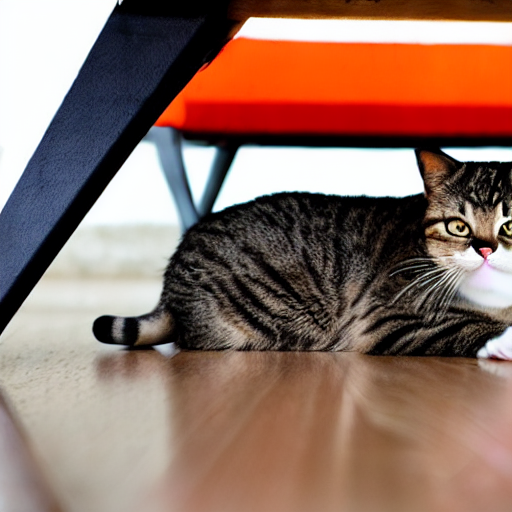

In [73]:
images[0]

## SD Output

In [74]:
out = sd_pipeline(
    prompt=prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    generator=torch.Generator("cuda").manual_seed(seed),
)

  0%|          | 0/20 [00:00<?, ?it/s]

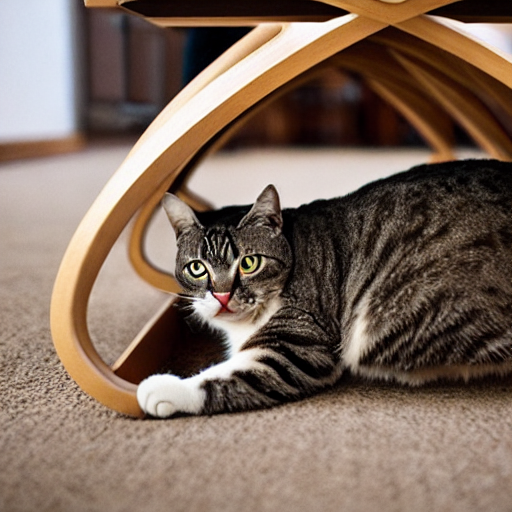

In [75]:
out.images[0]

In [76]:
attention_maps[0]

{0: tensor([[[8.2275e-01, 8.1024e-03, 4.3030e-03,  ..., 2.4223e-04,
           2.4557e-04, 2.5153e-04],
          [8.1738e-01, 1.2375e-02, 6.2180e-03,  ..., 2.0719e-04,
           2.0921e-04, 2.1935e-04],
          [8.0176e-01, 1.2718e-02, 6.7444e-03,  ..., 1.9991e-04,
           2.0146e-04, 2.1148e-04],
          ...,
          [8.1543e-01, 9.2468e-03, 5.3482e-03,  ..., 1.7369e-04,
           1.7560e-04, 1.8275e-04],
          [8.0371e-01, 9.4604e-03, 5.8289e-03,  ..., 2.0909e-04,
           2.1207e-04, 2.1970e-04],
          [8.2568e-01, 1.0025e-02, 5.0621e-03,  ..., 2.8038e-04,
           2.8300e-04, 2.9230e-04]],
 
         [[8.1250e-01, 9.5062e-03, 6.2752e-03,  ..., 2.0945e-04,
           2.1040e-04, 2.1815e-04],
          [8.4131e-01, 1.5221e-02, 6.7558e-03,  ..., 2.0146e-04,
           2.0182e-04, 2.1398e-04],
          [8.5645e-01, 8.1482e-03, 3.4580e-03,  ..., 1.7858e-04,
           1.7869e-04, 1.9193e-04],
          ...,
          [8.1006e-01, 1.9012e-02, 7.8354e-03,  ..., 1.

In [77]:
attn_map = attention_maps[0][19]

print(attn_map.shape)


torch.Size([16, 16, 77])


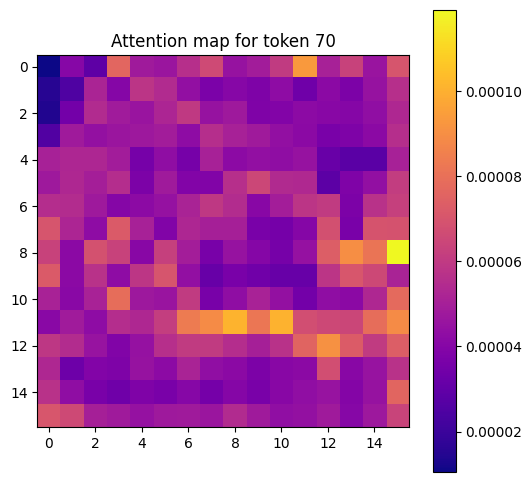

In [78]:
import matplotlib.pyplot as plt

# Choose a token index (e.g., 0 for CLS token)
token_idx = 70  # Change this to visualize other tokens
attn_map_for_token = attn_map[:, :, token_idx]

plt.figure(figsize=(6, 6))
plt.title(f"Attention map for token {token_idx}")
plt.imshow(attn_map_for_token, cmap="plasma")
plt.colorbar()
plt.show()


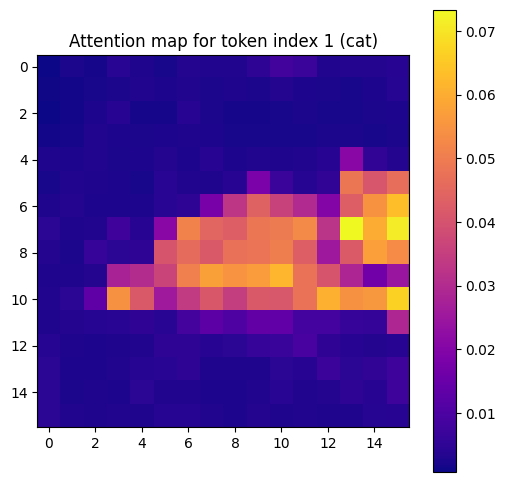

In [79]:
# Visualize the token corresponding to "cat"
token_idx = 1
attn_map_for_token = attn_map[:, :, token_idx]

plt.figure(figsize=(6, 6))
plt.title(f"Attention map for token index {token_idx} (cat)")
plt.imshow(attn_map_for_token, cmap="plasma")
plt.colorbar()
plt.show()


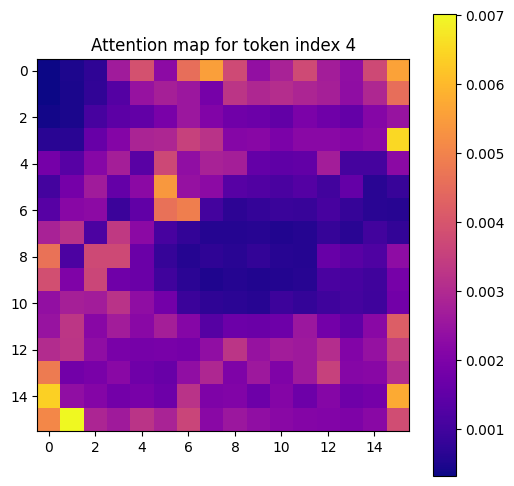

In [80]:
# Visualize the token corresponding to "table"
token_idx = 4
attn_map_for_token = attn_map[:, :, token_idx]

plt.figure(figsize=(6, 6))
plt.title(f"Attention map for token index {token_idx}")
plt.imshow(attn_map_for_token, cmap="plasma")
plt.colorbar()
plt.show()

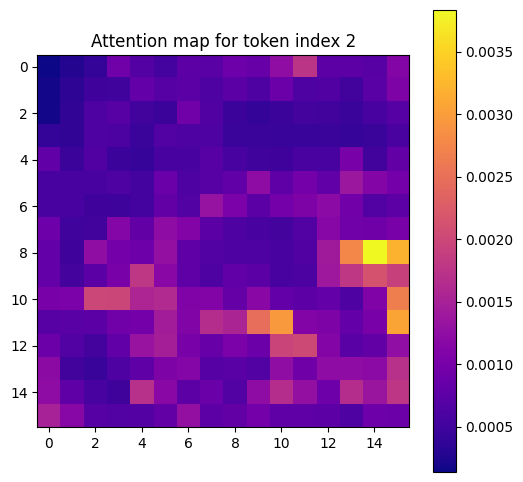

In [81]:
# Visualize the token corresponding to "under"
token_idx = 2
attn_map_for_token = attn_map[:, :, token_idx]

plt.figure(figsize=(6, 6))
plt.title(f"Attention map for token index {token_idx}")
plt.imshow(attn_map_for_token, cmap="plasma")
plt.colorbar()
plt.show()

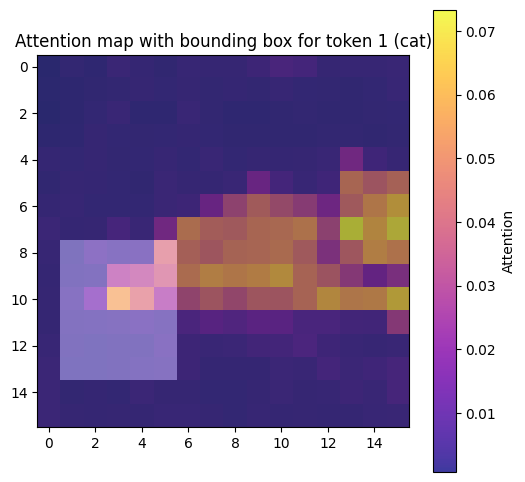

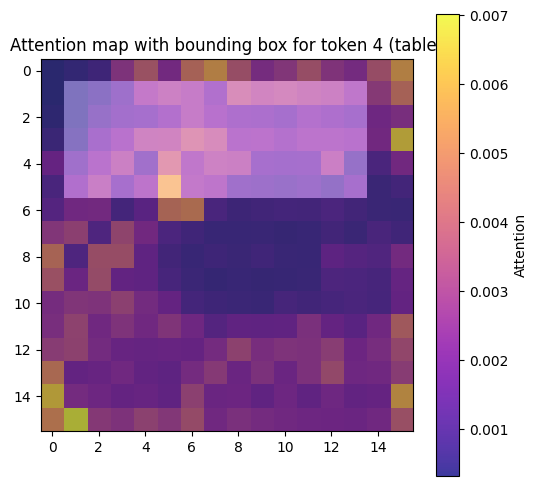

In [82]:
# Function to create bounding box mask
def create_bbox_mask(bbox, grid_size):
    mask = torch.zeros(grid_size)
    x_min, y_min, x_max, y_max = [
        int(coord * size) for coord, size in zip(bbox, grid_size*2)
    ]
    mask[y_min:y_max, x_min:x_max] = 1
    return mask

# Visualize the attention map with bounding box for "cat"
token_idx = 1  # Token for "cat"
attn_map_for_token = attn_map[:, :, token_idx].cpu().numpy()

# Create bounding box mask
bbox_cat = bounding_boxes[token_idx]  # Get bounding box for "cat"
bbox_mask_cat = create_bbox_mask(bbox_cat, attn_map_for_token.shape)

# Plot the attention map
plt.figure(figsize=(6, 6))
plt.title(f"Attention map with bounding box for token {token_idx} (cat)")
plt.imshow(attn_map_for_token, cmap="plasma", alpha=0.8)
plt.colorbar(label="Attention")

# Overlay the bounding box mask
plt.imshow(bbox_mask_cat, cmap="gray", alpha=0.3)  # Mask with transparency
plt.show()

# Visualize the attention map with bounding box for "table"
token_idx = 4  # Token for "table"
attn_map_for_token = attn_map[:, :, token_idx].cpu().numpy()

# Create bounding box mask
bbox_table = bounding_boxes[token_idx]  # Get bounding box for "table"
bbox_mask_table = create_bbox_mask(bbox_table, attn_map_for_token.shape)

# Plot the attention map
plt.figure(figsize=(6, 6))
plt.title(f"Attention map with bounding box for token {token_idx} (table)")
plt.imshow(attn_map_for_token, cmap="plasma", alpha=0.8)
plt.colorbar(label="Attention")

# Overlay the bounding box mask
plt.imshow(bbox_mask_table, cmap="gray", alpha=0.3)  # Mask with transparency
plt.show()


In [ ]:

# %cd /content/drive/MyDrive/DL/Diffusion-SpaceTime-Attn-main/attention_optimization/stable-diffusion
%cd /content/drive/MyDrive/conform/CONFORM/LayoutTransformer

!pip install --upgrade pip==23.0.1

# 1) (Optional) for torch 1.11.0 + CUDA 11.3
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

# 2) Install pinned versions
!pip install numpy==1.19.2

# 3) Install environment_replicate.yml pip deps
!pip install albumentations==0.4.3 diffusers opencv-python==4.1.2.30 pudb==2019.2 \
  invisible-watermark imageio==2.9.0 imageio-ffmpeg==0.4.2 \
  pytorch-lightning==1.4.2 omegaconf==2.1.1 test-tube>=0.7.5 \
  streamlit>=0.73.1 einops==0.3.0 torch-fidelity==0.3.0 \
  transformers==4.19.2 torchmetrics==0.6.0 kornia==0.6

# 4) Install Taming Transformers & CLIP from git
# !pip install git+https://github.com/CompVis/taming-transformers.git@master
# !pip install git+https://github.com/openai/CLIP.git@main

# 5) Additional packages
!pip install bounding-box==0.1.3 fairseq==0.12.2 spacy==3.5.1 nltk==3.8.1 inflect==6.0.2
!python -m spacy download en_core_web_sm

# 6) Install local stable-diffusion package
# !pip install -e .


/content/drive/MyDrive/conform/CONFORM/LayoutTransformer
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 GB 634.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu121
    Uninstalling torchvision-0.20.1+cu121:
      Successfully uninstalled torchvision-0.20.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 20.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement opencv-python==4.1.2.30 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.

2025-01-02 13:02:58.426002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-02 13:02:58.446201: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-02 13:02:58.452318: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-02 13:03:00.335412: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0000 00:00:1735822982.851658    5468 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/b

In [ ]:
%cd /content/drive/MyDrive/conform/CONFORM/LayoutTransformer

import nltk
nltk.download('wordnet')  # Download WordNet
nltk.download('stopwords')  # Download Stopwords

# !python inference/inference_coco.py --sentence 'The silver bed was situated to the right of the white couch.'

!python inference/inference_coco.py --sentence 'The cat is at the right of the table.'


/content/drive/MyDrive/conform/CONFORM/LayoutTransformer


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2025-01-02 13:03:35.124116: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-02 13:03:35.156316: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-02 13:03:35.166033: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-02 13:03:36.850811: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-01-02 13:03:39 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
I0000 00:00:1735823020.671050    5569 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but 